In [1]:
from sklearn.datasets import fetch_openml
mnist=fetch_openml('mnist_784', version=1)
X, y = mnist["data"], mnist["target"]

import matplotlib as mpl
import matplotlib.pyplot as plt
some_digit = X[0]
#X[0]:in last note book we saw that it is 5
some_digit_image = some_digit.reshape(28, 28)


import numpy as np
y = y.astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [2]:
#only try to identify one digit for example 5
#a binary classifier, capable of distinguishing between just two classes, 5 and not-5
y_train_5 = (y_train == 5)  # True for all 5s, False other digits
y_test_5 = (y_test == 5)


In [5]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

/home/elahe/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5576,    0,   21,    6,    9,   43,   37,    6,  224,    1],
       [   0, 6398,   38,   23,    4,   44,    4,    8,  213,   10],
       [  26,   27, 5242,   90,   71,   26,   62,   36,  371,    7],
       [  24,   17,  117, 5220,    2,  208,   28,   40,  405,   70],
       [  12,   14,   48,   10, 5192,   10,   36,   26,  330,  164],
       [  28,   15,   33,  166,   55, 4437,   76,   14,  538,   59],
       [  30,   14,   41,    2,   43,   95, 5560,    4,  128,    1],
       [  21,    9,   52,   27,   51,   12,    3, 5693,  188,  209],
       [  17,   63,   46,   90,    3,  125,   25,   10, 5429,   43],
       [  23,   18,   31,   66,  116,   32,    1,  179,  377, 5106]])

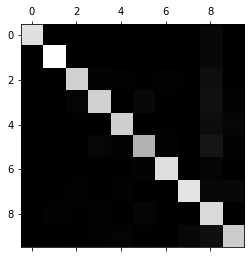

In [6]:
#look at an image representation of the confusion matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
#rows represent actual classes, columns represent predicted classes

In [7]:
#divide each value in the confusion matrix by the number of images in the corresponding class=error rates 
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

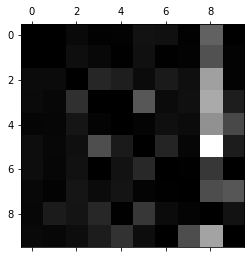

In [9]:
#Fill the diagonal with zeros to keep only the errors, and plot the result
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#column class 8 is quite bright---> many images get misclassified as 8s
#the row for class 8 is not that bad---> actual 8s in general get properly classified as 8s
#the confusion matrix is not necessarily symmetrical
#and 3s and 5s often get confused!!

In [23]:
#Analyzing individual errors                               ????????????????????????????????????????
import matplotlib.pyplot as plt
import matplotlib as mpl
cl_a, cl_b = 3, 5
X_aa = X_train[(y_train == cl_a) & (y_train_pred == cl_a)]
X_ab = X_train[(y_train == cl_a) & (y_train_pred == cl_b)]
X_ba = X_train[(y_train == cl_b) & (y_train_pred == cl_a)]
X_bb = X_train[(y_train == cl_b) & (y_train_pred == cl_b)]
plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()